In [2]:
import pandas, sklearn
import numpy as np
from pprint import pprint

# **Importing Datasets**

In [3]:
# d1 = pandas.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";")
d = pandas.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=";")

In [4]:
print(d.head())

   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.0              0.27         0.36  ...       0.45      8.8        6
1            6.3              0.30         0.34  ...       0.49      9.5        6
2            8.1              0.28         0.40  ...       0.44     10.1        6
3            7.2              0.23         0.32  ...       0.40      9.9        6
4            7.2              0.23         0.32  ...       0.40      9.9        6

[5 rows x 12 columns]


In [5]:
d.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
sorted(d.iloc[:, -1].unique())

[3, 4, 5, 6, 7, 8, 9]

In [7]:
x, y = d.iloc[:, :-1], d.iloc[:, -1]

# Scaling
from sklearn.preprocessing import scale
x = scale(x)

# Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [8]:
print(x.shape, y.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(4898, 11) (4898,)
(3428, 11) (3428,)
(1470, 11) (1470,)


# **Testing Models**

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## SVM

In [10]:
from sklearn import svm

[7, 8, 7, 6, 7, 6, 5, 5, 6, 5]
[7, 8, 8, 5, 7, 6, 5, 4, 6, 5]
Correct predictions: 862 of 1470


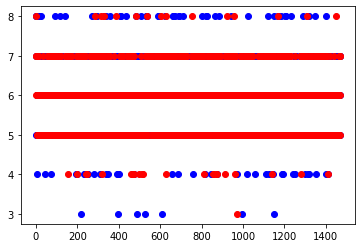

In [11]:
model = svm.SVR(kernel='rbf', C=10)
model.fit(x_train, y_train)
preds = [round(f) for f in model.predict(x_test)]
plt.scatter(range(len(x_test)), y_test, color="blue")
plt.scatter(range(len(x_test)), preds, color="red")
print(preds[:10])
print([*y_test[:10]])
print(f"Correct predictions:", sum(y_test == preds), "of", len(y_test) )

In [12]:
svr_scores = {}

# Grid Search
for k in ('linear', 'rbf'):
    for c in (1, 10, 20):
        for g in ('auto', 'scale'):
            model = svm.SVR(kernel=k, C=c, gamma=g)
            model.fit(x_train, y_train)
            preds = model.predict(x_test)
            preds = [int(x) for x in preds]
            score = accuracy_score(y_test, preds)
            avg_score = score.mean()
            svr_scores[f"{k}_{c}_{g}"] = avg_score
            print(f"{k}_{c}_{g} gave {score}") 

print()
pprint(svr_scores)

linear_1_auto gave 0.4496598639455782
linear_1_scale gave 0.4496598639455782
linear_10_auto gave 0.45102040816326533
linear_10_scale gave 0.45102040816326533
linear_20_auto gave 0.45034013605442175
linear_20_scale gave 0.45034013605442175
rbf_1_auto gave 0.4346938775510204
rbf_1_scale gave 0.43605442176870746
rbf_10_auto gave 0.4170068027210884
rbf_10_scale gave 0.4170068027210884
rbf_20_auto gave 0.41020408163265304
rbf_20_scale gave 0.4108843537414966

{'linear_10_auto': 0.45102040816326533,
 'linear_10_scale': 0.45102040816326533,
 'linear_1_auto': 0.4496598639455782,
 'linear_1_scale': 0.4496598639455782,
 'linear_20_auto': 0.45034013605442175,
 'linear_20_scale': 0.45034013605442175,
 'rbf_10_auto': 0.4170068027210884,
 'rbf_10_scale': 0.4170068027210884,
 'rbf_1_auto': 0.4346938775510204,
 'rbf_1_scale': 0.43605442176870746,
 'rbf_20_auto': 0.41020408163265304,
 'rbf_20_scale': 0.4108843537414966}


In [13]:
svc_scores = {}

# Grid Search
for k in ('linear', 'rbf'):
    for c in (1, 10, 20):
        for g in ('auto', 'scale'):
            model = svm.SVC(kernel=k, C=c, gamma=g)
            model.fit(x_train, y_train)
            preds = model.predict(x_test)
            preds = [int(x) for x in preds]
            score = accuracy_score(y_test, preds)
            avg_score = score.mean()
            svc_scores[f"{k}_{c}_{g}"] = avg_score 
            print(f"{k}_{c}_{g} gave {score}") 

print()
pprint(svc_scores)

linear_1_auto gave 0.527891156462585
linear_1_scale gave 0.527891156462585
linear_10_auto gave 0.5258503401360545
linear_10_scale gave 0.5258503401360545
linear_20_auto gave 0.5258503401360545
linear_20_scale gave 0.5258503401360545
rbf_1_auto gave 0.5653061224489796
rbf_1_scale gave 0.5653061224489796
rbf_10_auto gave 0.580952380952381
rbf_10_scale gave 0.580952380952381
rbf_20_auto gave 0.591156462585034
rbf_20_scale gave 0.591156462585034

{'linear_10_auto': 0.5258503401360545,
 'linear_10_scale': 0.5258503401360545,
 'linear_1_auto': 0.527891156462585,
 'linear_1_scale': 0.527891156462585,
 'linear_20_auto': 0.5258503401360545,
 'linear_20_scale': 0.5258503401360545,
 'rbf_10_auto': 0.580952380952381,
 'rbf_10_scale': 0.580952380952381,
 'rbf_1_auto': 0.5653061224489796,
 'rbf_1_scale': 0.5653061224489796,
 'rbf_20_auto': 0.591156462585034,
 'rbf_20_scale': 0.591156462585034}


## Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [15]:
dtr_scores = {}

# Grid Search
for crit in ('mse', 'mae'):
    for d in (None, 3, 8):
        for sp in ('best', 'random'):
            model = DecisionTreeRegressor(criterion=crit, max_depth=d, splitter=sp)
            model.fit(x_train, y_train)
            preds = model.predict(x_test)
            preds = [int(x) for x in preds]
            score = accuracy_score(y_test, preds)
            avg_score = score.mean()
            dtr_scores[f"{crit}_{d}_{sp}"] = avg_score 

print()
pprint(dtr_scores)


{'mae_3_best': 0.5142857142857142,
 'mae_3_random': 0.5068027210884354,
 'mae_8_best': 0.5333333333333333,
 'mae_8_random': 0.5251700680272109,
 'mae_None_best': 0.5666666666666667,
 'mae_None_random': 0.5986394557823129,
 'mse_3_best': 0.39659863945578233,
 'mse_3_random': 0.3693877551020408,
 'mse_8_best': 0.4496598639455782,
 'mse_8_random': 0.4312925170068027,
 'mse_None_best': 0.5782312925170068,
 'mse_None_random': 0.5863945578231292}


In [16]:
dtc_scores = {}

# Grid Search
for crit in ('gini', 'entropy'):
    for d in (None, 3, 8):
        for sp in ('best', 'random'):
            model = DecisionTreeClassifier(criterion=crit, max_depth=d, splitter=sp)
            model.fit(x_train, y_train)
            preds = model.predict(x_test)
            preds = [int(x) for x in preds]
            score = accuracy_score(y_test, preds)
            avg_score = score.mean()
            dtc_scores[f"{crit}_{d}_{sp}"] = avg_score 

print()
pprint(dtc_scores)


{'entropy_3_best': 0.5027210884353741,
 'entropy_3_random': 0.454421768707483,
 'entropy_8_best': 0.5421768707482993,
 'entropy_8_random': 0.507482993197279,
 'entropy_None_best': 0.5972789115646259,
 'entropy_None_random': 0.5768707482993197,
 'gini_3_best': 0.5251700680272109,
 'gini_3_random': 0.49047619047619045,
 'gini_8_best': 0.5183673469387755,
 'gini_8_random': 0.5210884353741496,
 'gini_None_best': 0.582312925170068,
 'gini_None_random': 0.591156462585034}


## Polynomial Regressor


In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

> This one takes a lot of time!

In [18]:
pol_scores = {}

# Grid Search
for deg in range(1, 9):
    model = make_pipeline(PolynomialFeatures(deg), LinearRegression())
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    preds = [int(x) for x in preds]
    score = accuracy_score(y_test, preds)
    avg_score = score.mean()
    pol_scores[deg] = avg_score 
    print(f"{deg} gave {score}")

print()
pprint(pol_scores)

1 gave 0.45170068027210886
2 gave 0.4496598639455782
3 gave 0.42857142857142855
4 gave 0.36054421768707484
5 gave 0.2510204081632653
6 gave 0.26326530612244897
7 gave 0.23945578231292516
8 gave 0.23265306122448978

{1: 0.45170068027210886,
 2: 0.4496598639455782,
 3: 0.42857142857142855,
 4: 0.36054421768707484,
 5: 0.2510204081632653,
 6: 0.26326530612244897,
 7: 0.23945578231292516,
 8: 0.23265306122448978}


## Kernel Ridge Model

In [19]:
from sklearn.kernel_ridge import KernelRidge

In [20]:
kr_scores = {}

# Grid Search
for k in  ('poly', 'rbf'):
    for a in np.logspace(-2, 2, 5):
        for g in np.logspace(-2, 2, 5):
            model = KernelRidge(alpha=a, gamma=g, kernel=k)
            model.fit(x_train, y_train)
            preds = model.predict(x_test)
            preds = [int(x) for x in preds]
            score = accuracy_score(y_test, preds)
            avg_score = score.mean()
            kr_scores[f"{k}_{a}_{g}"] = avg_score 
            print(f"{k}_{a}_{g} scored {score}")

print()
pprint(kr_scores)

poly_0.01_0.01 scored 0.44829931972789117
poly_0.01_0.1 scored 0.43673469387755104
poly_0.01_1.0 scored 0.42857142857142855
poly_0.01_10.0 scored 0.42857142857142855


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=4.27837e-18): result may not be accurate.
  overwrite_a=False)


poly_0.01_100.0 scored 0.42857142857142855
poly_0.1_0.01 scored 0.4414965986394558
poly_0.1_0.1 scored 0.43945578231292515
poly_0.1_1.0 scored 0.4306122448979592
poly_0.1_10.0 scored 0.42925170068027213


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=4.27843e-17): result may not be accurate.
  overwrite_a=False)


poly_0.1_100.0 scored 0.42925170068027213
poly_1.0_0.01 scored 0.43605442176870746
poly_1.0_0.1 scored 0.454421768707483
poly_1.0_1.0 scored 0.4306122448979592
poly_1.0_10.0 scored 0.42993197278911566
poly_1.0_100.0 scored 0.42993197278911566
poly_10.0_0.01 scored 0.43741496598639457
poly_10.0_0.1 scored 0.43537414965986393
poly_10.0_1.0 scored 0.4231292517006803
poly_10.0_10.0 scored 0.42108843537414964
poly_10.0_100.0 scored 0.42108843537414964
poly_100.0_0.01 scored 0.34965986394557824
poly_100.0_0.1 scored 0.37755102040816324
poly_100.0_1.0 scored 0.32789115646258504
poly_100.0_10.0 scored 0.3231292517006803
poly_100.0_100.0 scored 0.3231292517006803
rbf_0.01_0.01 scored 0.44829931972789117
rbf_0.01_0.1 scored 0.4095238095238095
rbf_0.01_1.0 scored 0.13537414965986394
rbf_0.01_10.0 scored 0.0
rbf_0.01_100.0 scored 0.0
rbf_0.1_0.01 scored 0.4435374149659864
rbf_0.1_0.1 scored 0.42108843537414964
rbf_0.1_1.0 scored 0.12653061224489795
rbf_0.1_10.0 scored 0.0
rbf_0.1_100.0 scored 0.0


# **Getting the best Model and Parameters**

In [21]:
models = {
    "SupportVectorMachine Regressor": svr_scores,
    "SupportVectorMachine Classifier": svc_scores,
    "DecisionTree Regressor": dtr_scores,
    "DecisionTree Classifier": dtc_scores,
    "Polynomial Regressor": pol_scores,
    "KernelRidge Regressor" : kr_scores
}

best_model = "unset"
optimal_parameters = "unset"
max_accuracy = 0

for mod in models:

    mx_acc = max(models[mod].values())

    if mx_acc > max_accuracy:
        best_model = mod
        max_accuracy = mx_acc

        for param in models[mod]:
            if models[mod][param] == mx_acc:
                optimal_parameters = param 
                break


print(f"Best model is {best_model}")
print(f"Optimal Parameters: {optimal_parameters}")
ma = max_accuracy*100 
print(f"Max Accuracy: {ma:.2f}%")


Best model is DecisionTree Regressor
Optimal Parameters: mae_None_random
Max Accuracy: 59.86%


In [ ]:
# If we run the first several models with different random states, the Best model can actually change.
# But the max accuracy always stays at about ~59.8%